<a href="https://colab.research.google.com/github/veapasichnyk/Codveda-Internship-/blob/main/Logistic_Regression_for_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Logistic Regression for Binary Classification

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt


##Load data

In [2]:
df = pd.read_csv('churn-bigml-80.csv')

In [3]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
print(df.shape)
print(df.info())

(2666, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 

##Preprocessing data

In [5]:
df['Churn'] = df['Churn'].astype(int)  # convert boolean to 0/1

In [6]:
# Features and target
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [7]:
# Identify numerical and categorical columns
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include="object").columns.tolist()

In [10]:
# Preprocessing: scale numerics and one-hot encode categoricals
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(drop="first"), cat_cols)
])

# Logistic Regression pipeline
clf = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("log_reg", LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Train model
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Account length',
                                                   'Area code',
                                                   'Number vmail messages',
                                                   'Total day minutes',
                                                   'Total day calls',
                                                   'Total day charge',
                                                   'Total eve minutes',
                                                   'Total eve calls',
                                                   'Total eve charge',
                                                   'Total night minutes',
                                                   'Total night calls',
                                                   'Total night charge',
                                                   'Total intl minutes',
                                                   'Total intl calls',
                                                   'Total intl charge',
                                                   'Customer service calls']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['State',
                                                   'International plan',
                                                   'Voice mail plan'])])),
                ('log_reg',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

##Evaluate Model Performance

In [12]:
# Predictions
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]  # probability of churn

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

# Detailed Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Accuracy: 0.7509363295880149
Precision: 0.3202614379084967
Recall: 0.6282051282051282
F1 Score: 0.42424242424242425
ROC AUC: 0.743392937471885

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.77      0.84       456
           1       0.32      0.63      0.42        78

    accuracy                           0.75       534
   macro avg       0.62      0.70      0.63       534
weighted avg       0.84      0.75      0.78       534

Confusion Matrix:
 [[352 104]
 [ 29  49]]


**Interpretation**

- Recall > Precision: The model is better at catching churners than it is at avoiding false alarms.

- This is often acceptable if the business prefers to err on the side of caution (i.e., offer retention incentives even to some non-churners).

- ROC AUC of 0.74 shows the model is learning meaningful patterns.

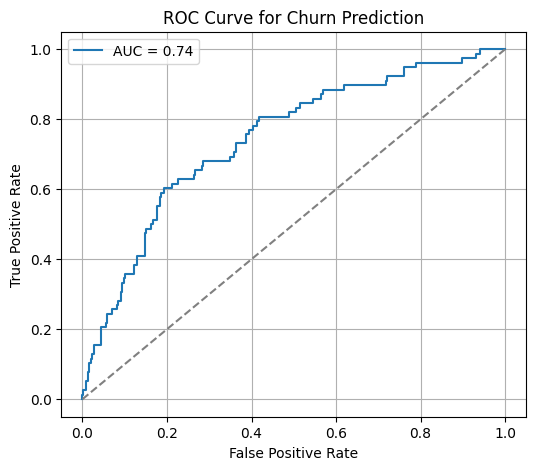

In [13]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Churn Prediction")
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Get feature names from preprocessor
feature_names = (
    num_cols +
    list(clf.named_steps["preprocessing"]
            .named_transformers_["cat"]
            .get_feature_names_out(cat_cols))
)

# Get coefficients
coefs = clf.named_steps["log_reg"].coef_[0]
odds_ratios = np.exp(coefs)

# Combine into DataFrame
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefs,
    "Odds Ratio": odds_ratios
}).sort_values(by="Odds Ratio", ascending=False)

print(coef_df.head(10))

                   Feature  Coefficient  Odds Ratio
66  International plan_Yes     2.780703   16.130363
58                State_TX     1.309242    3.703367
41                State_MT     1.221848    3.393453
40                State_MS     1.133617    3.106874
55                State_SC     0.915714    2.498558
15  Customer service calls     0.890561    2.436497
46                State_NJ     0.873396    2.395031
50                State_OH     0.788073    2.199155
62                State_WA     0.786611    2.195942
36                State_ME     0.779016    2.179328


**Summary**

Features like having an international plan and calling customer service often are critical early indicators of potential churn.

The model also picks up regional churn patterns, possibly revealing locations where the service experience needs improvement.

These insights can guide targeted retention strategies — such as reviewing the international plan offer or improving service quality in high-churn states.